In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

In [2]:
n_samples = 10_000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2, 0]] / 10
data = data * np.array([1, -1])

This is our training data. For this example, it is only 2D.  
$q(x^{(0)})$ - is our original data distribution. Every point on the graph below is a data point with 2 coordinates (features).  
The idea is to gradually add noise to this distribution so that the final distribution will be pure gaussian (noise) which we can sample from.  
$\pi(y) = \pi(x^{(T)}) = N (x^{(T)};0,I)$ is our final well-behaved distribution. Equation 1 of the paper (Table App. 1).  
Transformation $q(x^{(0)}) \rightarrow \pi(y)$ happens by repeatedly applying Markov diffusion kernel $T_{\pi}$.  
$q(x^{(t)}|x^{(t-1)}) = T_{\pi}(x^{(t)}|x^{(t-1)};\beta_t)$. We only depend on the previous time step - Markov property.  
This conditional distribution is just a gaussian (Table App. 1).

(-2.0, 2.0)

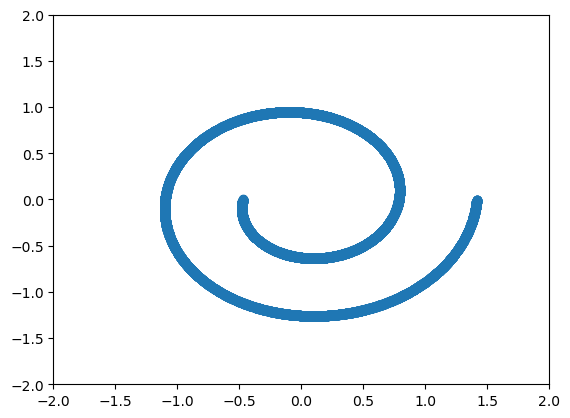

In [3]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])

$q(x^{(t)}|x^{(t-1)}) = N(x^{(t)};x^{(t-1)}\sqrt{1-\beta_t},I\beta_t)$

In [4]:
def forward_process(data, T, betas):   
    
    for t in range(T):
        beta_t = betas[t]
        mu = data * torch.sqrt(1 - beta_t)
        std = torch.sqrt(beta_t)
        # Sample from q(x_t | x_{t-1})
        data = mu + torch.randn_like(data) * std # data ~ N(mu, std)
    return data

In [12]:
torch.sigmoid(torch.linspace(-18, 10, T))* (3e-1 - 1e-5) + 1e-5

tensor([1.0005e-05, 1.0009e-05, 1.0019e-05, 1.0039e-05, 1.0081e-05, 1.0166e-05,
        1.0339e-05, 1.0696e-05, 1.1426e-05, 1.2924e-05, 1.5995e-05, 2.2291e-05,
        3.5199e-05, 6.1659e-05, 1.1589e-04, 2.2702e-04, 4.5461e-04, 9.2014e-04,
        1.8701e-03, 3.7989e-03, 7.6763e-03, 1.5317e-02, 2.9796e-02, 5.5312e-02,
        9.5000e-02, 1.4616e-01, 1.9823e-01, 2.3992e-01, 2.6735e-01, 2.8313e-01,
        2.9153e-01, 2.9581e-01, 2.9794e-01, 2.9899e-01, 2.9951e-01, 2.9976e-01,
        2.9988e-01, 2.9994e-01, 2.9997e-01, 2.9999e-01])

In [ ]:
T = 40
betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5 ## Chosen here to give desired result, but it also can be learned
## data scaling * (3e-1 - 1e-5) + 1e-5 puts in in the range (3e-1,1e-5)
xT = forward_process(torch.from_numpy(data), T, betas)

In [13]:
print(xT.mean(0))
print(xT.std(0))
### This is a goof result for \pi because the mean are almost 0 and stddevs are 1

tensor([ 0.0122, -0.0142], dtype=torch.float64)
tensor([0.9960, 1.0063], dtype=torch.float64)


(-2.0, 2.0)

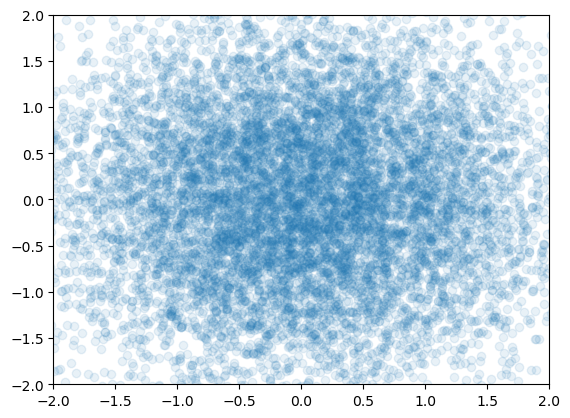

In [7]:
plt.scatter(xT[:, 0].data.numpy(), xT[:, 1].data.numpy(), alpha=0.1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])